# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import math

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Question 1

We solve the model for different combinations of alpha and sigma and backout the choiceset $L_{M}, H_{M}, L_{F}, H_{F}$ that maximizes utility for the household. We solve the model based on parameters and constraints on individual hours and household hours worked. 


1) We import the model1 from HouseholdSpecializationModelClass()
2) We create lists of $\alpha$ and $\sigma$-values 
3) We create an empty list for relative_hours worked
4) We solve the model for different combinations of alpha and sigmas by calling the solve_discrete def in ModelClass
5) We determine relative hours worked in the home by dividing optimal hours for females by optimal hours for males
6) We put relative hours into the empty list.
7) We put relative hours into a dataframe and make it into a latex table
8) Possible extension: create 3D plot over combinations of alpha, sigmas and relative hours.

In [2]:
from inauguralproject import HouseholdSpecializationModelClass
model1 = HouseholdSpecializationModelClass()
par = model1.par
sol = model1.sol

In [3]:
# Run loop for different combinations of sigma and alpha
alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5,1.0,1.5]
relative_hours_1 = {}

for sigma in sigma_list:
    par.sigma = sigma
    for alpha in alpha_list:
        par.alpha = alpha
        opt = model1.solve_discrete()
        
        relative_hours_1[sigma,alpha] = opt.HF/opt.HM

/Users/bruger/Desktop/Introduction to numerical programming/projects-2023-aca/inauguralproject/inauguralproject.py:68: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))
/Users/bruger/Desktop/Introduction to numerical programming/projects-2023-aca/inauguralproject/inauguralproject.py:68: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))
/Users/bruger/Desktop/Introduction to numerical programming/projects-2023-aca/inauguralproject/inauguralproject.py:73: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


In [4]:
df = pd.DataFrame(list(relative_hours_1.items()), columns=['(sigma,alpha)', 'Relative hours'])
df[['sigma', 'alpha']] = pd.DataFrame(df['(sigma,alpha)'].tolist(), index=df.index)
df.drop('(sigma,alpha)', axis=1, inplace=True)
df = df.reindex(columns=['sigma', 'alpha', 'Relative hours'])

print(df.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 sigma &  alpha &  Relative hours \\
\midrule
   0.5 &   0.25 &        0.545455 \\
   0.5 &   0.50 &        1.000000 \\
   0.5 &   0.75 &        1.833333 \\
   1.0 &   0.25 &        0.307692 \\
   1.0 &   0.50 &        1.000000 \\
   1.0 &   0.75 &        3.250000 \\
   1.5 &   0.25 &        0.214286 \\
   1.5 &   0.50 &        1.000000 \\
   1.5 &   0.75 &        4.666667 \\
\bottomrule
\end{tabular}



/var/folders/fj/trr23jhx25j8_78nf00613400000gn/T/ipykernel_16955/2560377024.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))



We see that greater values  of $\alpha$ increases relative hours spend for females in the home. This dominates the $\sigma$ (substitution) effect. That is; the more productive females are in the home, the more they will work in the home relative to their husbands. And even when home production are complete substitutues ($\sigma=1$), then females will work less in the home is they are less productive (small alpha).


# Question 2


1) We import the model2 from HouseholdSpecializationModelClass()
2) In the py-file we have created a solve function for the vector of wages
3) Py file: We create vectors to store results. 
4) Py file: We loop through the wage vector and solve the model 
5) Py file: We set up an if statement where we say to solve the model if discrete statement is true and otherwise solve the model continuosley
6) Py file: We save the results, both for the log vectors and the optimal solutions
7) In the notebook, we call the solve_wF_vec, set the discrete statement to true and save the log hours vector
8) We plot log hours and against log wages in no. 3


In [5]:
from inauguralproject import HouseholdSpecializationModelClass
model2 = HouseholdSpecializationModelClass()
par = model2.par
sol = model2.sol
model2.solve_wF_vec(discrete=True) # solve model  
lH_vec_disc = par.lH_vec.copy() # store results 

/Users/bruger/Desktop/Introduction to numerical programming/projects-2023-aca/inauguralproject/inauguralproject.py:73: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


See plot in next question

# Question 3


1) We import the model3 from HouseholdSpecializationModelClass()
2) In the py-file we have a continues solver 
3) Py file: We define and objective function
4) Py file: We set constaints, bounds and an initial quess
5) Py file: We save optimal solutions 
6) In the notebook, we call the solve_wF_vec, set the discrete statement to false and save the log hours vector
7) We plot log hours and against log wages
8) The graph looks different when using the different optimziers. Fx SQLP. Figure out why this is. 

In [6]:
from inauguralproject import HouseholdSpecializationModelClass
model3 = HouseholdSpecializationModelClass()
par = model3.par
sol = model3.sol
model3.solve_wF_vec(discrete=False) #solve model
lH_vec_cont = par.lH_vec.copy() # store results       

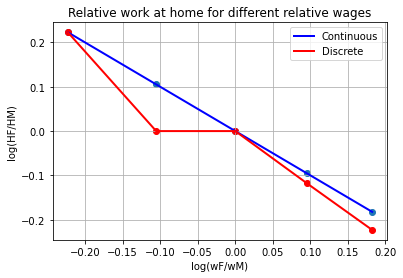

In [7]:
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(par.lw_vec, lH_vec_cont, color='blue', lw=2,label="Continuous")
ax.scatter(par.lw_vec,lH_vec_cont)
ax.plot(par.lw_vec, lH_vec_disc, color='red', lw=2,label="Discrete")
ax.scatter(par.lw_vec,lH_vec_disc,color='red')

ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relative work at home for different relative wages")
plt.legend()
plt.show()

For both the discrete and continous solution, the $\frac{H_{F}}{H_{M}}$ is drecreasing in $\frac{W_{F}}{W_{M}}$ - that is; the higher the female wages, the less she work in the home relative to her husband. Moreover, $\frac{H_{F}}{H_{M}}$ is linearly decreasing when using the continous solution whereas it has kinks when using the discrete solution. 

# Question 4

1) In the py-file, we set up the two estimate functions
2) In estimate_1 we calculate the error between estimated betas and predicted beta-values by the model for different values of alpha and sigma. That is; the size of the term $(B_{0}-\hat{\beta_{0}})^2+(B_{1}-\hat{\beta_{1}})^2$ for different values of alpha and beta.
3) We plot the errors against combinations alpha and sigma (mesh grid) in a 3D plot
3) In estimaet_2, we define an objective function x that minimizes distance between estiamted beta-values and predicted beta-values by the model: $min_{\alpha,\sigma}(B_{0}-\hat{\beta_{0}})^2+(B_{1}-\hat{\beta_{1}})^2$


In [8]:
from inauguralproject import HouseholdSpecializationModelClass
model4 = HouseholdSpecializationModelClass()
par = model4.par
sol = model4.sol

In [9]:
# Estimate errors based on different combinations of alpha and sigmas
alpha_vals = np.linspace(0.3, 0.99, 30)
sigma_vals = np.linspace(0.05, 0.6, 30)

obj_vals = np.zeros((len(alpha_vals), len(sigma_vals)))

for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        # Set current alpha and sigma values
        par.alpha = alpha
        par.sigma = sigma
        # Call estimate() and store the objective function value
        obj_val = model4.estimate_1(alpha, sigma)
        obj_vals[i, j] = obj_val


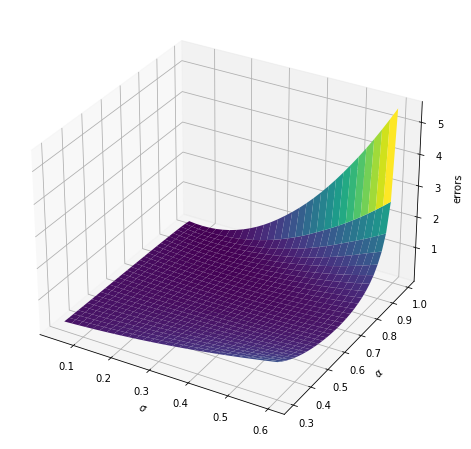

In [10]:
# Create a 3D plot of sigma, alpha, and errors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(sigma_vals, alpha_vals)
ax.plot_surface(X, Y, obj_vals, cmap='viridis')

ax.set_xlabel(fr"$\sigma$") 
ax.set_ylabel(fr"$\alpha$")
ax.set_zlabel('errors')

plt.show()

We see that the minimum lies in the area of $\sigma$-values and high $\alpha$-values. 

In [11]:
# Minimize objective function and make guess based on 3-D plot 
model4.estimate_2(do_print=True)

/Users/bruger/Desktop/Introduction to numerical programming/projects-2023-aca/inauguralproject/inauguralproject.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))
/Users/bruger/Desktop/Introduction to numerical programming/projects-2023-aca/inauguralproject/inauguralproject.py:68: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-alpha)*HM**((sigma-1)/sigma)+alpha*HF**((sigma-1)/sigma))**(sigma/(sigma-1))


Optimization terminated successfully.
alpha_hat: 0.9820
sigma_hat: 0.1000
beta0_hat: 0.4001
beta1_hat: -0.0999
Termination value: 0.0000


In [20]:
# Plot lH vec for different alpha nad sigma values
par.alpha = 0.9820
par.sigma = 0.1000
model4.solve_wF_vec(discrete=False) #solve model
lH_vec_cont_2 = par.lH_vec.copy() # store results     
lH_vec_cont_2 


array([0.40808134, 0.39606318, 0.38542118, 0.37554776, 0.36614804])

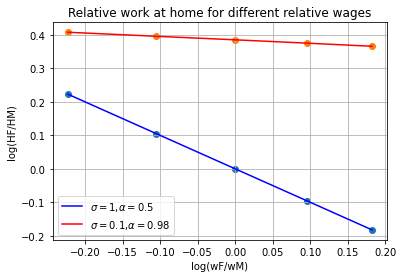

In [21]:
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(par.lw_vec, lH_vec_cont, color='blue',label=fr"$\sigma=1$,$\alpha=0.5$")
ax.plot(par.lw_vec, lH_vec_cont_2, color='red',label=fr"$\sigma=0.1$,$\alpha=0.98$")
ax.scatter(par.lw_vec,lH_vec_cont)
ax.scatter(par.lw_vec,lH_vec_cont_2)

ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relative work at home for different relative wages")
plt.legend()
plt.show()

Using a lower value for $\sigma$ (assuming low subsability between home production of male and females) and a high $\alpha$ (assuming higher productivivy for females in home production) have help match the model predictions to the estimated data.

# Question 5


We add a disutility of working in the labor market for women and interpret this as norms. We assume that a part of home production is related to caring of children and cf. Kleven et al. (2019), the child penalty only strikes women. The utility function looks as follows: $\frac{Q^{1-\rho}}{1-\rho}-\nu(\frac{T_{M}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_{F}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\delta(LF)^{\kappa})$.
The parameter $\delta$ is turned on only in question in five. We now repeat the procedure for question 4, but determing the values of $\sigma$ and $\kappa$ that minimizes the errors while setting $\alpha=0.5$. 


1) In the py-file, we set up the two estimate functions
2) In estimate_3, we calculate the error between estimated betas and predicted beta-values by the model for different values of sigma and kappa
3) We plot the errors against combinations sigma and kappa (mesh grid) in a 3D plot
3) In estimaet_4, we define an objective function x that minimizes distance between estimated beta-values and predicted beta-values by the model


In [14]:
from inauguralproject import HouseholdSpecializationModelClass
model5 = HouseholdSpecializationModelClass()
par = model5.par
sol = model5.sol

In [15]:
# Estimate errors based on different combinations of alpha and sigmas
sigma_vals = np.linspace(0.05, 1.5, 30)
kappa_vals = np.linspace(0.05, 6, 30)

obj_vals = np.zeros((len(sigma_vals), len(kappa_vals)))

for i, sigma in enumerate(sigma_vals):
    for j, kappa in enumerate(kappa_vals):
        # Set current alpha and sigma values
        par.alpha=0.5
        par.dummy=1.
        par.sigma = sigma
        par.kappa = kappa
        # Call estimate() and store the objective function value
        obj_val = model5.estimate_3(sigma, kappa)
        obj_vals[i, j] = obj_val

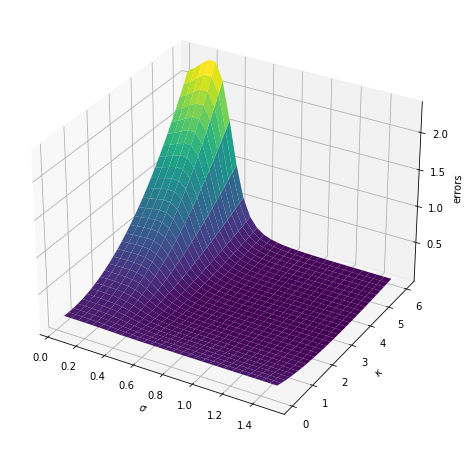

In [16]:
# Create a 3D plot of sigma, alpha, and errors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(sigma_vals, kappa_vals)
ax.plot_surface(X, Y, obj_vals, cmap='viridis')

ax.set_xlabel(fr"$\sigma$") 
ax.set_ylabel(fr"$\kappa$")
ax.set_zlabel('errors')

plt.show()

We see that the nimimum lies somewhere in the middel of kappa values and high sigma values. 

In [17]:
model5.par.alpha=0.5
model5.par.dummy=1.
model5.estimate_4(do_print=True)

Optimization terminated successfully.
sigma_hat: 0.8856
kappa_hat: 5.4139
beta0_hat: 0.4000
beta1_hat: -0.1000
Termination value: 0.0000


In [22]:
# Plot lH vec for different alpha nad sigma values
par.alpha = 0.5
par.sigma = 0.8856
par.kappa = 5.4139
model5.solve_wF_vec(discrete=False) #solve model
lH_vec_cont_3 = par.lH_vec.copy() # store results     
lH_vec_cont_3 

array([0.42223352, 0.41051628, 0.40019776, 0.39064016, 0.38156229])

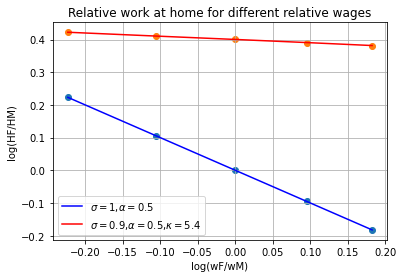

In [23]:
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(par.lw_vec, lH_vec_cont, color='blue',label=fr"$\sigma=1$,$\alpha=0.5$")
ax.plot(par.lw_vec, lH_vec_cont_3, color='red',label=fr"$\sigma=0.9$,$\alpha=0.5$,$\kappa=5.4$")
ax.scatter(par.lw_vec,lH_vec_cont)
ax.scatter(par.lw_vec,lH_vec_cont_3)

ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Relative work at home for different relative wages")
plt.legend()
plt.show()

Adjusting for norms makes it possible to calibrate the model with high substability in home production ($\sigma$) and equal productivity ($\alpha$). Hence, within out model framework, we can have that men and women are equally productive and that home production can be substituted between them and still match estimated data. It just requires an enormous amount of norms that brings down female labor market supply substantially. 